In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('all_energy_statistics.csv')

In [3]:
pd.set_option('display.max_rows', 200)

In [4]:
import matplotlib.pyplot as plt

In [19]:
from matplotlib.widgets import Cursor

In [5]:
plt.close("all")

In [6]:
#Podział źródeł na podstawie jednostek - nas interesują kilowatogodziny

energy = ['electricity_net_installed_capacity_of_electric_power_plants',
       'falling_water', 'geothermal', 'hydro', 'nuclear_electricity',
       'solar_electricity', 'thermal_electricity',
       'tide_wave_and_ocean_electricity', 'total_electricity',
       'wind_electricity']

renewables = ['falling_water', 'geothermal', 'hydro', 
       'solar_electricity',
       'tide_wave_and_ocean_electricity',
       'wind_electricity']

nuclear = ['nuclear_electricity']

clean_energy = renewables + nuclear

fossil_energy = ['thermal_electricity'] #czyli jeśli dobrze rozumiem wszystko co z paliw kopalniach tj. węgiel, gaz itd. 

In [7]:
#Podział kolumny commodity_transaction

split_commodities = data.commodity_transaction.str.split(" - | – ",  expand=True)
split_commodities.head()

,0,1,2
0,Additives and Oxygenates,Exports,None
1,Additives and Oxygenates,Exports,None
2,Additives and Oxygenates,Exports,None
3,Additives and Oxygenates,Exports,None
4,Additives and Oxygenates,Exports,None


In [8]:
# Nadaję nazwy podzielonym kolumnom

split_commodities.columns = ["commodity","transaction_type","additional_transaction_info"]
split_commodities.head()

,commodity,transaction_type,additional_transaction_info
0,Additives and Oxygenates,Exports,None
1,Additives and Oxygenates,Exports,None
2,Additives and Oxygenates,Exports,None
3,Additives and Oxygenates,Exports,None
4,Additives and Oxygenates,Exports,None


In [9]:
# Łączę podzielone kolumny z danymi 

data = pd.concat([data, 
                split_commodities.commodity.str.lower(),
                split_commodities.transaction_type,
                split_commodities.additional_transaction_info.str.lower()], 
               axis=1)

data.head(5)

,country_or_area,commodity_transaction,year,unit,quantity,quantity_footnotes,category,commodity,transaction_type,additional_transaction_info
0,Austria,Additives and Oxygenates - Exports,1996,"Metric tons, thousand",5.0,NaN,additives_and_oxygenates,additives and oxygenates,Exports,None
1,Austria,Additives and Oxygenates - Exports,1995,"Metric tons, thousand",17.0,NaN,additives_and_oxygenates,additives and oxygenates,Exports,None
2,Belgium,Additives and Oxygenates - Exports,2014,"Metric tons, thousand",0.0,NaN,additives_and_oxygenates,additives and oxygenates,Exports,None
3,Belgium,Additives and Oxygenates - Exports,2013,"Metric tons, thousand",0.0,NaN,additives_and_oxygenates,additives and oxygenates,Exports,None
4,Belgium,Additives and Oxygenates - Exports,2012,"Metric tons, thousand",35.0,NaN,additives_and_oxygenates,additives and oxygenates,Exports,None


In [10]:
not_interesting = ['Electricity - net production', 'Electricity - total production, autoproducer', 'Electricity - total production, main activity']

In [11]:
#Filtruję informacje - tylko dla Polski, tylko energia, tylko produkcja + Usuwam te informacje które się powtarzają/nas nie interesują 

data_energy = data[(data.category.isin(energy)) & (~data['commodity_transaction'].isin(not_interesting)) & (data.transaction_type.str.contains('production'))][['country_or_area','commodity_transaction','year','quantity']].sort_values(['year','country_or_area','commodity_transaction'], ascending = True)

In [12]:
data_energy2 = data_energy.groupby(['year','commodity_transaction']).sum().reset_index()
all_gross = data_energy2[data_energy2['commodity_transaction'] == 'Electricity - Gross production'][['year','quantity']]
all_gross

,year,quantity
0,1990,1.194777e+07
8,1991,1.219341e+07
16,1992,1.227358e+07
24,1993,1.257487e+07
32,1994,1.288611e+07
40,1995,1.332475e+07
48,1996,1.375331e+07
56,1997,1.404259e+07
64,1998,1.437060e+07
72,1999,1.480123e+07


In [13]:
all_final = data_energy2.merge(all_gross, how='left', on='year')
all_final.rename(columns={'quantity_x': 'quantity', 'quantity_y': 'total_quantity'}, inplace=True)
all_final['%share'] = all_final['quantity']/all_final['total_quantity']*100
all_final.drop(columns=['total_quantity'], inplace=True)

In [14]:
all_final

,year,commodity_transaction,quantity,%share
0,1990,Electricity - Gross production,1.194777e+07,100.000000
1,1990,Electricity - total geothermal production,3.645600e+04,0.305128
2,1990,Electricity - total hydro production,2.190662e+06,18.335323
3,1990,Electricity - total nuclear production,2.019763e+06,16.904938
4,1990,Electricity - total solar production,6.810000e+02,0.005700
5,1990,Electricity - total thermal production,7.695625e+06,64.410561
6,1990,"Electricity - total tide, wave production",5.290000e+02,0.004428
7,1990,Electricity - total wind production,3.850000e+03,0.032224
8,1991,Electricity - Gross production,1.219341e+07,100.000000
9,1991,Electricity - total geothermal production,3.746400e+04,0.307248


In [17]:
all_nuclear = all_final[all_final['commodity_transaction'] == 'Electricity - total nuclear production']
all_hydro = all_final[all_final['commodity_transaction'] == 'Electricity - total hydro production']
all_thermal = all_final[all_final['commodity_transaction'] == 'Electricity - total thermal production']
all_tide = all_final[all_final['commodity_transaction'] == 'Electricity - total tide, wave production']
all_wind = all_final[all_final['commodity_transaction'] == 'Electricity - total wind production']
all_solar = all_final[all_final['commodity_transaction'] == 'Electricity - total solar production']
all_geo = all_final[all_final['commodity_transaction'] == 'Electricity - total geothermal production']

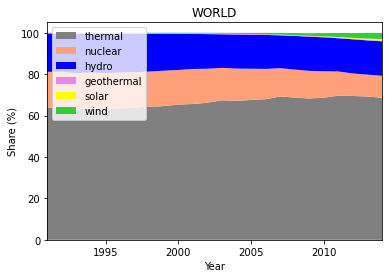

In [22]:
#Wykres all
fig, ax1 = plt.subplots()
ax1.stackplot(all_thermal['year'],all_thermal['%share'],all_nuclear['%share'],all_hydro['%share'],all_geo['%share'],all_solar['%share'],all_wind['%share'],labels=['thermal','nuclear','hydro','geothermal','solar','wind'], colors=['grey','lightsalmon','blue','violet','yellow','limegreen'])
ax1.set_xlabel('Year')
plt.xlim([1991,2014])
ax1.set_ylabel('Share (%)')
ax1.set_title('WORLD')
ax1.legend(loc='upper left')
plt.show()